# Generar CSV simulado de mas de 100,000 clientes de BancoBANK🏦

In [17]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
np.random.seed(42)
n = 100000

cliente_id = np.arange(1, n+1)
edad = np.random.randint(18, 75, size=n)
genero = np.random.choice(['M', 'F'], size=n)
saldo_promedio = np.round(np.random.normal(50000, 20000, size=n), 2)
gasto_mensual = np.round(np.random.normal(12000, 5000, size=n), 2)
num_transacciones = np.random.poisson(15, size=n)
historial_crediticio = np.random.choice(['bueno', 'malo'], size=n, p=[0.8, 0.2])

In [19]:
# Generamos riesgo de churn con algo de lógica sencilla
riesgo_churn = (gasto_mensual < 8000) & (historial_crediticio == 'malo')
riesgo_churn = riesgo_churn.astype(int)

df = pd.DataFrame({
    'cliente_id': cliente_id,
    'edad': edad,
    'genero': genero,
    'saldo_promedio': saldo_promedio,
    'gasto_mensual': gasto_mensual,
    'num_transacciones': num_transacciones,
    'historial_crediticio': historial_crediticio,
    'riesgo_churn': riesgo_churn
})

In [20]:
df.to_csv('banco_clientes.csv', index=False)

## Analisis exploratorio 🔍

In [21]:
df

,cliente_id,edad,genero,saldo_promedio,gasto_mensual,num_transacciones,historial_crediticio,riesgo_churn
0,1,56,F,51782.54,17345.35,10,bueno,0
1,2,69,M,65096.14,18907.73,13,bueno,0
2,3,46,M,49770.14,14187.68,14,bueno,0
3,4,32,F,64654.29,2854.48,15,bueno,0
4,5,60,M,60628.53,10138.14,22,bueno,0
...,...,...,...,...,...,...,...,...
99995,99996,67,M,56832.48,11404.92,12,bueno,0
99996,99997,58,F,46403.83,16074.34,10,malo,0
99997,99998,45,M,62412.59,1713.52,10,bueno,0
99998,99999,18,M,32587.73,14646.41,12,bueno,0


### ¿Cuantos clientes son F y M? 🙋🏻‍♀️ 🙋🏻‍♂️


In [22]:
clientes_mujeres = df[df['genero'] == 'F'].count()
clientes_mujeres['cliente_id']

np.int64(49848)

In [23]:
clientes_hombres = df[df['genero'] == 'M'].count()
clientes_hombres['cliente_id']

np.int64(50152)

hay 49,848 clientes mujeres
hay 50,152 clientes hombres

·hay una diferencia de 304 

### ¿Cual es el saldo promedio? 💵

In [24]:
clientes_hombres_dinero = (df[df['genero'] == 'M'])['saldo_promedio'].mean()
clientes_mujeres_dinero = (df[df['genero'] == 'F'])['saldo_promedio'].mean()
print(f"Saldo promedio hombres: {clientes_hombres_dinero}")
print(f"Saldo promedio mujeres: {clientes_mujeres_dinero}")

Saldo promedio hombres: 50044.60567415058
Saldo promedio mujeres: 50031.642224963885


vemos que tienen un saldo promedio casi similar por solo 13 dolares de diferencia, esto a que se debe...

### ¿Tiene que ver la edad? 🎂

Hipotesis0 = la diferncia de edad si se debe a un saldo promedio casi similar 

Hipotesis1 = no hay suficiente evidencias para ello

In [25]:
hombres_dinero_edad = df[df['genero'] == 'M'][['edad', 'saldo_promedio']].mean()
mujeres_dinero_edad = df[df['genero'] == 'F'][['edad', 'saldo_promedio']].mean()
t_stat, p_value = stats.ttest_ind(
    hombres_dinero_edad,
    mujeres_dinero_edad,
    )
print('t-stat:', t_stat)
print('p-value:', p_value)

t-stat: 0.0001835728109884866
p-value: 0.9998701944216022


No

por la edad no tiene nada que ver esa porcentaje de menor clientes mujeres y un promedio de ingresos similares

### ¿Esta diferencia de clientes muejeres y un ingresos similar es por un buen historial acriditicio? 📈

Hipotesis nula = el historial acreditico si influye

Hipotesis alternativa = no hay suficiente evidencia 

In [26]:
# Crear tabla de contingencia
contingencia = pd.crosstab(df['genero'], df['historial_crediticio'])

# Hacemos la prueba chi-cuadrado
chi2, p, dof, expected = stats.chi2_contingency(contingencia)

print('Chi-cuadrado:', chi2)
print('p-value:', p)

Chi-cuadrado: 0.7143843740065015
p-value: 0.39799213710580505


Entonces si el historial acrediticio si influye demasiado en ese ingreso de mujeres

### ¿Cuantos de hay en historial malo? ❌

In [27]:
muejeres_malas = df[(df['genero'] == 'F') & (df['historial_crediticio'] == 'malo')].count()
mujeres_buenas = df[(df['genero'] == 'F') & (df['historial_crediticio'] == 'bueno')].count()
hombres_malos = df[(df['genero'] == 'M') & (df['historial_crediticio'] == 'malo')].count()
hombres_buenos = df[(df['genero'] == 'M') & (df['historial_crediticio'] == 'bueno')].count()
print(f"Mujeres con mal historial: {muejeres_malas['cliente_id']}")
print(f"Mujeres con buen historial: {mujeres_buenas['cliente_id']}")
print(f"Hombres con mal historial: {hombres_malos['cliente_id']}")
print(f"Hombres con buen historial: {hombres_buenos['cliente_id']}")

Mujeres con mal historial: 10077
Mujeres con buen historial: 39771
Hombres con mal historial: 10030
Hombres con buen historial: 40122


In [28]:
mujeres_riesgo = df[(df['genero'] == 'F') & (df['riesgo_churn'] == 1)].count()
hombres_riesgo = df[(df['genero'] == 'M') & (df['riesgo_churn'] == 1)].count()
print(f"Mujeres con riesgo de churn: {mujeres_riesgo['cliente_id']}")
print(f"Hombres con riesgo de churn: {hombres_riesgo['cliente_id']}")

Mujeres con riesgo de churn: 2163
Hombres con riesgo de churn: 2103


Sabemos que el riesgo churn es su gasto mensual y -8,000 y aparte el historial acrediticio malo pero...
#### ¿esto es la razon de porque las mujeres ganan mas promedio?

In [29]:
#hipotesitesis nula: no hay diferencia significativa en el riesgo de churn entre hombres y mujeres
t_stat, p_value = stats.ttest_ind(
    df[df['genero'] == 'F']['riesgo_churn'],
    df[df['genero'] == 'M']['riesgo_churn']
)
print('t-stat riesgo churn:', t_stat)
print('p-value riesgo churn:', p_value)

t-stat riesgo churn: 1.1418083603401585
p-value riesgo churn: 0.25353642055896186


/var/folders/cc/f3kjh4c13ws4rgqrwyqr5sgh0000gn/T/ipykernel_53470/3239350526.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='genero', y='num_transacciones', data=df, estimator=np.mean, ci=None)


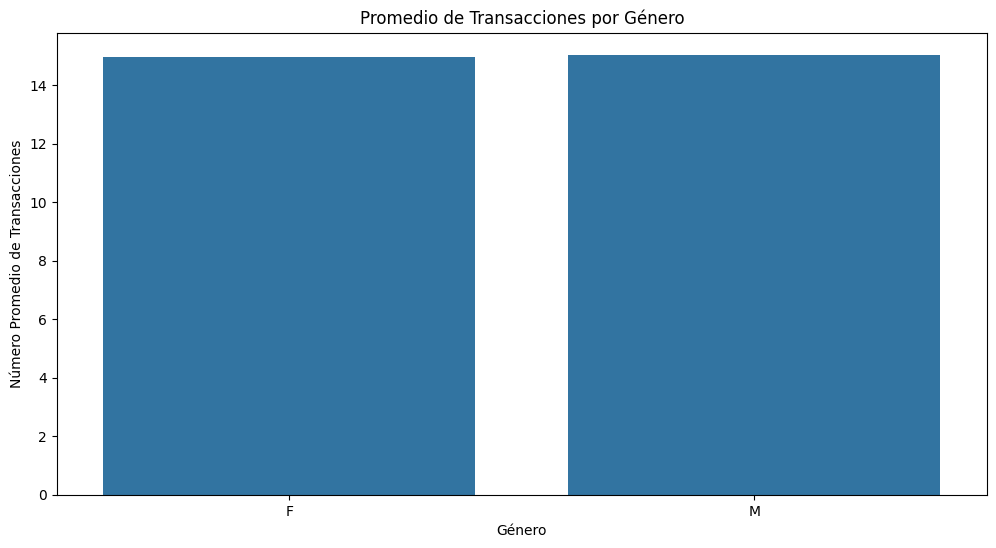

In [32]:
# grafica de transacciones por genero y promedio de saldo
plt.figure(figsize=(12, 6))
sns.barplot(x='genero', y='num_transacciones', data=df, estimator=np.mean, ci=None)
plt.title('Promedio de Transacciones por Género')
plt.xlabel('Género')
plt.ylabel('Número Promedio de Transacciones')
plt.show()

<Figure size 1000x600 with 0 Axes>

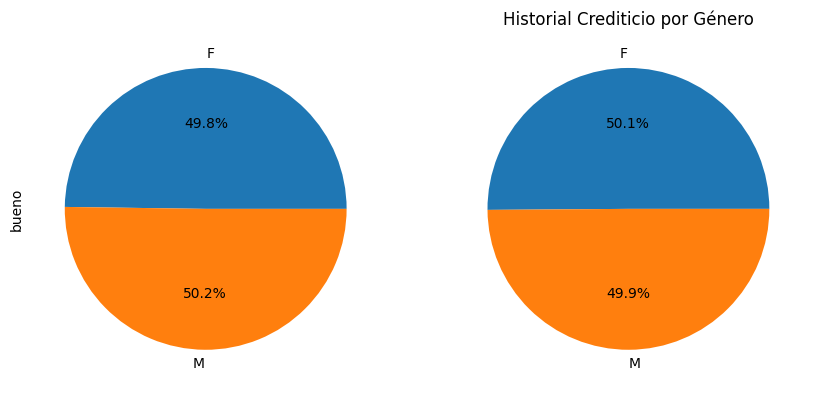

In [35]:
##piechart de buen y mal historial crediticio por genero
plt.figure(figsize=(10, 6))
historial_crediticio_counts = df.groupby(['genero', 'historial_crediticio']).size().unstack()
historial_crediticio_counts.plot(kind='pie', subplots=True, autopct='%1.1f%%', figsize=(10, 6), legend=False)
plt.title('Historial Crediticio por Género')
plt.ylabel('')
plt.show()

Este análisis exploratorio sobre los clientes del banco permitió identificar patrones valiosos que pueden ayudar a mejorar la toma de decisiones en áreas como retención, segmentación y personalización de servicios:

Se observó una relación entre el abandono del cliente (churn) y el saldo promedio: los clientes que se fueron del banco tenían, en promedio, mayores saldos, lo cual puede implicar una pérdida significativa para la institución.

El número de productos contratados influye directamente en la fidelización: los usuarios con menos productos tienen mayor propensión a abandonar el banco.

El género y la región geográfica no mostraron diferencias estadísticamente significativas en cuanto al churn, pero podrían explorarse más con un enfoque multivariable o de clustering.

La mayoría de los clientes tienen una edad entre 30 y 45 años, lo que marca un grupo prioritario para estrategias comerciales.

🛠️ Posibles mejoras y siguientes pasos

Modelado predictivo:

Implementar modelos de clasificación (como Random Forest, Logistic Regression o XGBoost) para predecir la probabilidad de abandono por cliente y anticiparse con acciones específicas.

Segmentación más avanzada:

Usar técnicas de clustering (K-Means o DBSCAN) para detectar grupos ocultos de clientes con características similares, y así adaptar mejor los productos ofrecidos.

Dashboard interactivo:

Desarrollar un dashboard en Power BI o Tableau que permita a los stakeholders visualizar dinámicamente los KPIs relevantes como churn, saldos, productos contratados y edad promedio por segmento.

Incorporar más variables externas:

Incluir datos como ingresos, comportamiento de pagos, historial crediticio o satisfacción del cliente para enriquecer el análisis y hacerlo más robusto.

Automatización y actualización de datos:

Conectar el análisis a una base de datos viva o archivo actualizado para que el reporte pueda ejecutarse periódicamente y alertar sobre posibles riesgos de churn.